## 1. Yellowstone Wolves

https://www.nps.gov/articles/yellowstone-wolf-project-report-2016.htm

In [68]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import transforms

%config InlineBackend.figure_format = 'retina'

In [69]:
index = range(1995,2017)
northernrg =[20,20,31,42,37, 66, 69, 80, 86, 88, 68, 76, 98, 58,40,38,38,35,32, 42,50, 41]
interior=   [0, 18,31,41,38, 52, 60, 70, 89, 82, 52, 61, 75, 72,56,60,60,50,60, 63,48, 67]

In [70]:
wolf = pd.DataFrame(list(zip(index,northernrg,interior)), 
               columns =['Year','NR', 'Int']) 
wolf.head()

,Year,NR,Int
0,1995,20,0
1,1996,20,18
2,1997,31,31
3,1998,42,41
4,1999,37,38


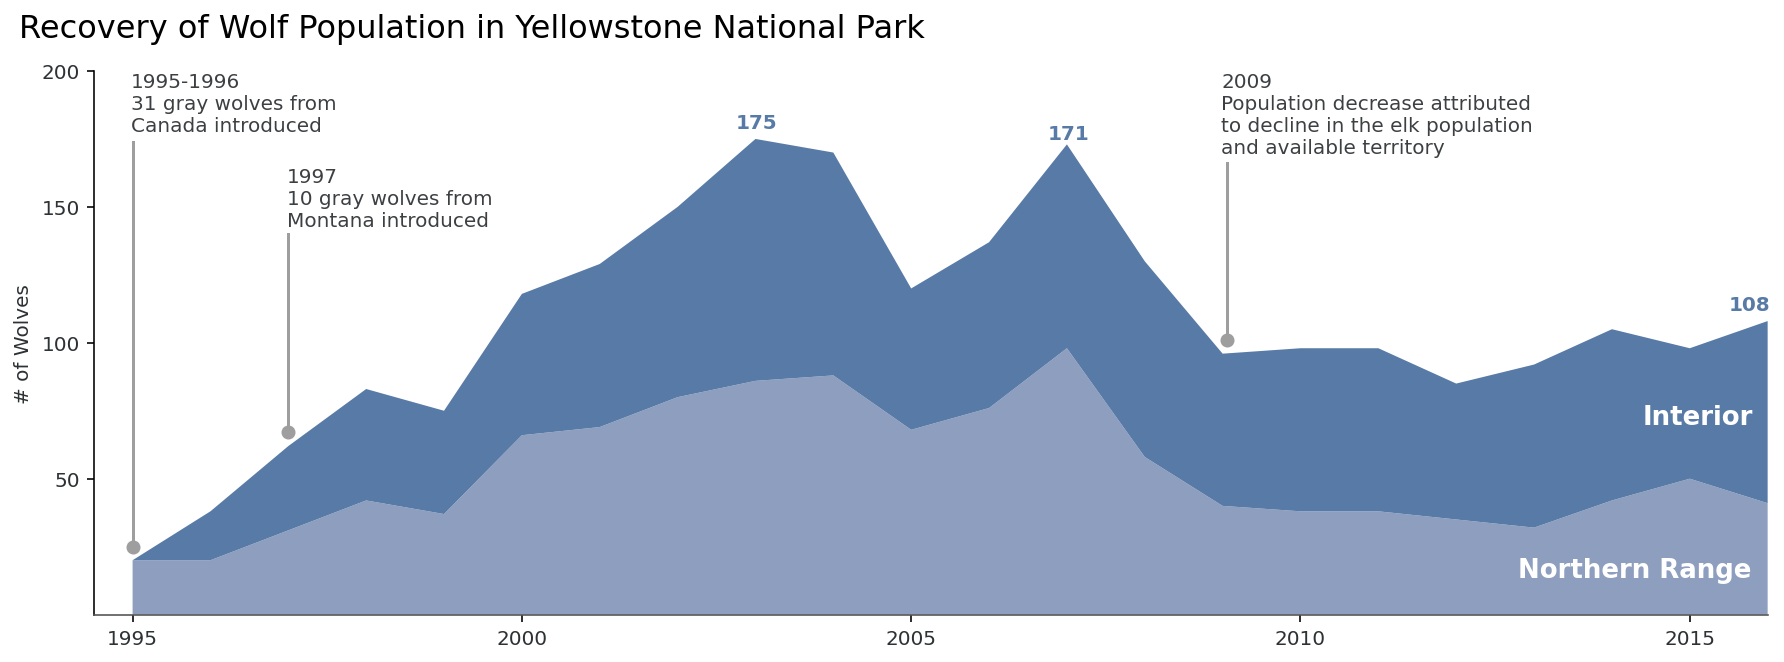

In [79]:
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle('Recovery of Wolf Population in Yellowstone National Park', fontsize=16, x=.3, y=.96)

plt.stackplot(index, northernrg, interior, labels=['Northern Range','Interior'], colors=['#8E9EBF', '#587AA6'])
#plt.legend(loc='center right', bbox_to_anchor=(1, 0.7))

plt.xlim([1994.5,2016])
plt.xticks(np.arange(1995,2016,5),color='#2D3234')
plt.yticks([50,100,150,200],color='#2D3234')
plt.ylim([0,200])
ax.set_ylabel('# of Wolves', color='#2D3234')

plt.scatter([1995,1997,2009.05],[25,67,101], c='#9E9E9E')
plt.plot([1995,1995],[25,174], c='#9E9E9E')
ax.text(1994.98, 178, '1995-1996\n31 gray wolves from\nCanada introduced', fontsize=10, color='#3D4043')
plt.plot([1997,1997],[67,140], c='#9E9E9E')
ax.text(1996.98, 143, '1997\n10 gray wolves from\nMontana introduced', fontsize=10, color='#3D4043')
plt.plot([2009.05,2009.05],[101,166], c='#9E9E9E')
ax.text(2008.98, 170, 
        '2009\nPopulation decrease attributed\nto decline in the elk population\nand available territory', 
        fontsize=10, color='#3D4043')
ax.text(2006.75, 175, '171', fontweight='bold', fontsize=10, color='#587AA6')
ax.text(2002.75, 179, '175', fontweight='bold', fontsize=10, color='#587AA6')
ax.text(2015.5, 112, '108', fontweight='bold', fontsize=10, color='#587AA6')
ax.text(2014.4, 70, 'Interior', fontweight='bold', fontsize=13, color='white')
ax.text(2012.8, 14, 'Northern Range', fontweight='bold', fontsize=13, color='white')

ax.spines['bottom'].set_color('#525252')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('wolves.jpg', bbox_inches='tight', pad_inches=0)

### 2. Wildfires by State

https://www.kaggle.com/edhirif/predict-the-causes-of-wildfires-using-python

In [83]:
import sqlite3
cnx = sqlite3.connect(r'/Users/elysecs/Downloads//FPA_FOD_20170508.sqlite')
fire = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires'", cnx)
fire.head(5)

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10


In [87]:
fire['FIRE_YEAR'].unique()

array([2005, 2004, 2006, 2008, 2002, 2007, 2009, 2001, 2003, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2010, 2011, 2012, 2013,
       2014, 2015])

In [18]:
df = fire['STATE'].value_counts()

In [19]:
df_CA = fire[fire['STATE']=='CA']
df_GA = fire[fire['STATE']=='GA']
df_TX = fire[fire['STATE']=='TX']

In [20]:
df_CA = fire[fire['STATE']=='CA']
df_CA.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE
0,2005,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10
1,2004,Lightning,38.933056,-120.404444,CA,2453137.5,0.25
2,2004,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10
3,2004,Lightning,38.559167,-119.913333,CA,2453184.5,0.10
4,2004,Lightning,38.559167,-119.933056,CA,2453184.5,0.10


In [65]:
color_dict={'Miscellaneous': 'gray', 'Equipment Use':'#B7773A', 'Lightning':'#F2921D',
            'Debris Burning': '#D9631E','Arson':'#BF4124'}

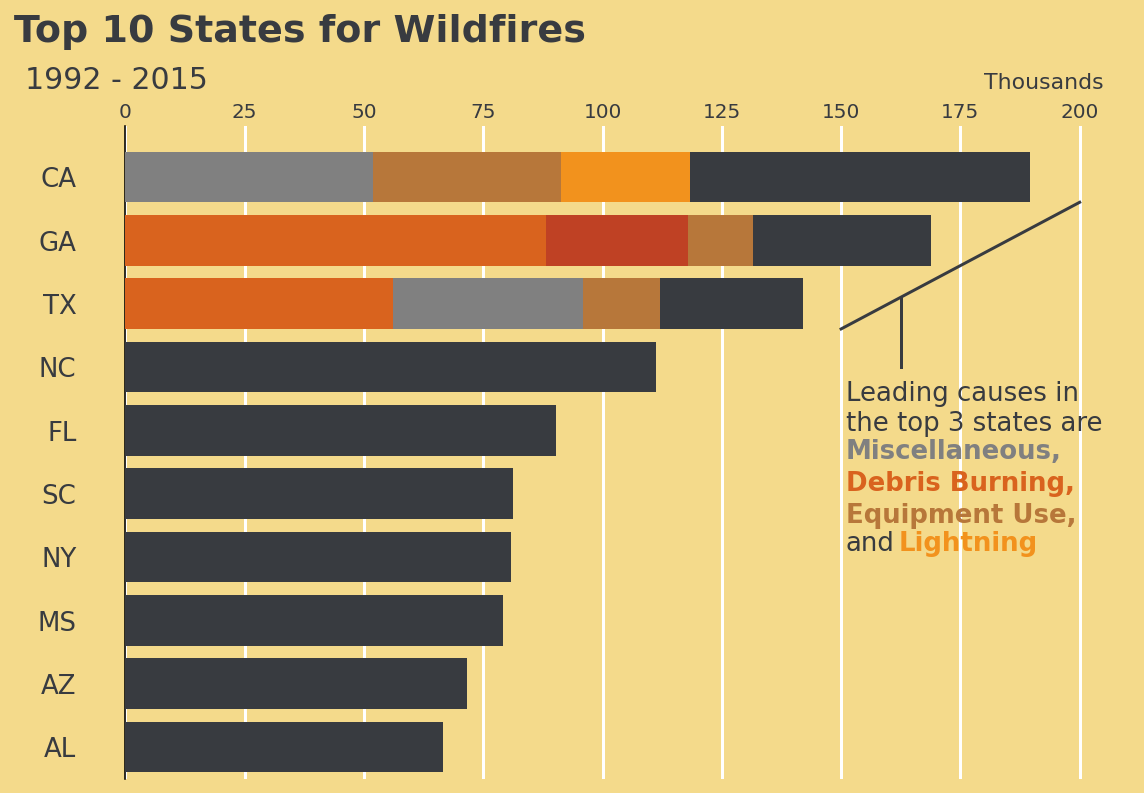

In [97]:
fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('#F4DA8B')
fig.patch.set_height(22)
ax.set_facecolor('#F4DA8B')
fig.suptitle('Top 10 States for Wildfires', fontsize=19, x=.26, y=1.01, fontweight='bold', color='#383B40')
ax.barh(df.index[:10][::-1],df.values[:10][::-1], color='#383B40',zorder=5)
plt.text(180_000, 10.4, 'Thousands',fontsize=11,color='#383B40')
plt.text(-21_000, 10.4, '1992 - 2015',fontsize=15,color='#383B40')

# Causes color bars
for pos,state in enumerate(df.index[:3][::-1]):
    df_state = fire[fire['STATE']==state]
    causes = df_state['STAT_CAUSE_DESCR'].value_counts()[:3]
    for i, row in enumerate(causes.iteritems()):
        color = color_dict[row[0]]
        left = sum(causes.iloc[:i])
        ax.barh(pos+7, row[1], color=color, left=[left],zorder=10)

# Ticks
plt.xticks(np.arange(0,200_001,25000),color='#2D3234')
plt.ylim([-.5,9.8])
plt.xlim([0,210_500])
ax.set_xticklabels([0]+[n for n in range(25,201,25)],color='#383B40', fontsize=10)
ax.xaxis.tick_top()
ax.set_yticklabels(df.index[:10][::-1], fontsize=13,color='#383B40')
ax.tick_params(axis='y', which='both',length=0)
plt.gca().xaxis.grid(True, zorder=0, linewidth=1.5, color='white')

# Y Label Padding
plt.tick_params(axis='x', which='both', pad=-1, bottom=False, top=False, labelbottom=False)
fig.set_size_inches(9, 6, forward=True) 
plt.draw()
yax = ax.get_yaxis()
pad = max(T.label.get_window_extent().width for T in yax.majorTicks)+5
yax.set_tick_params(pad=pad)
plt.draw()

# Annotation
plt.plot([150_000,200_000], [6.6,8.6], c='#383B40')
plt.plot([162500,162500], [6,7.1], c='#383B40')
plt.text(151_000, 5, 'Leading causes in \nthe top 3 states are',fontsize=13,color='#383B40', ha='left')
plt.text(151_000, 4.55, 'Miscellaneous,',fontsize=13,color='gray', fontweight='bold')
plt.text(151_000, 4.05, 'Debris Burning,',fontsize=13,color='#D9631E', fontweight='bold')
plt.text(151_000, 3.55, 'Equipment Use,',fontsize=13,color='#B7773A', fontweight='bold')
plt.text(151_000, 3.1, 'and',fontsize=13,color='#383B40')
plt.text(162_000, 3.1, 'Lightning',fontsize=13,color='#F2921D', fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('wildfire.jpg')#, bbox_inches='tight', pad_inches=.5)